In [1]:
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
iris_data = sns.load_dataset('iris')

In [3]:
def min_max_scaling(x):
    mini = min(x)
    diff = max(x) - mini
    return [(i - mini)/(diff) for i in x]

iris_data_normalised = iris_data.copy()
for i in iris_data.columns[:-1]:
    iris_data_normalised[i] = min_max_scaling(iris_data[i])

print("Original data : \n")
print(iris_data.describe())
print("\nNormalised data :\n")   
print(iris_data_normalised.describe())

Original data : 

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Normalised data :

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       0.428704     0.440556      0.467458     0.458056
std        0.230018     0.181611      0.299203     0.317599
min        0.000000     0.000000      0.000000     0.000000
25%        0.222222     0.333333      0.101695     0.083333
50%        0.416667     0.416667      0.567797     0.500000
75

In [4]:
X_train, X_test = train_test_split(iris_data.iloc[:, :-1], test_size=0.2, random_state=42)
y_train = iris_data.loc[X_train.index, 'species']
y_test = iris_data.loc[X_test.index, 'species']

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

X_train_minmax = pd.DataFrame(scaler.transform(X_train), columns=iris_data.columns[:-1], index=X_train.index)
X_test_minmax = pd.DataFrame(scaler.transform(X_test), columns=iris_data.columns[:-1], index=X_test.index)

print("\n=== MinMaxScaler ===")
print("\nTrain set (after fit + transform):\n", X_train_minmax.describe())
print("\nTest set (after transform using train scaler):\n", X_test_minmax.describe())

Train set shape: (120, 4)
Test set shape: (30, 4)

=== MinMaxScaler ===

Train set (after fit + transform):
        sepal_length  sepal_width  petal_length  petal_width
count    120.000000   120.000000    120.000000   120.000000
mean       0.443873     0.442361      0.478363     0.451389
std        0.242296     0.187135      0.307429     0.313454
min        0.000000     0.000000      0.000000     0.000000
25%        0.235294     0.333333      0.087719     0.083333
50%        0.426471     0.416667      0.570175     0.500000
75%        0.617647     0.583333      0.719298     0.708333
max        1.000000     1.000000      1.000000     1.000000

Test set (after transform using train scaler):
        sepal_length  sepal_width  petal_length  petal_width
count     30.000000    30.000000     30.000000    30.000000
mean       0.494118     0.433333      0.505848     0.484722
std        0.248537     0.160295      0.323036     0.337879
min        0.117647     0.083333      0.052632     0.000000
25

In [5]:
scaler2 = preprocessing.StandardScaler()
scaler2.fit(X_train)

X_train_standard = pd.DataFrame(scaler2.transform(X_train), columns=iris_data.columns[:-1], index=X_train.index)
X_test_standard = pd.DataFrame(scaler2.transform(X_test), columns=iris_data.columns[:-1], index=X_test.index)

print("=== StandardScaler ===")
print("\nTrain set (after fit + transform):\n", X_train_standard.describe())
print("\nTest set (after transform using train scaler):\n", X_test_standard.describe())

=== StandardScaler ===

Train set (after fit + transform):
        sepal_length   sepal_width  petal_length   petal_width
count  1.200000e+02  1.200000e+02  1.200000e+02  1.200000e+02
mean   6.513308e-16  3.108624e-16  2.960595e-17 -2.960595e-17
std    1.004193e+00  1.004193e+00  1.004193e+00  1.004193e+00
min   -1.839628e+00 -2.373778e+00 -1.562535e+00 -1.446088e+00
25%   -8.644522e-01 -5.850598e-01 -1.276006e+00 -1.179118e+00
50%   -7.212234e-02 -1.378803e-01  2.998997e-01  1.557325e-01
75%    7.202076e-01  7.564785e-01  7.869979e-01  8.231577e-01
max    2.304867e+00  2.992376e+00  1.703889e+00  1.757553e+00

Test set (after transform using train scaler):
        sepal_length  sepal_width  petal_length  petal_width
count     30.000000    30.000000     30.000000    30.000000
mean       0.208241    -0.048444      0.089779     0.106788
std        1.030061     0.860167      1.055172     1.082443
min       -1.352040    -1.926598     -1.390618    -1.446088
25%       -0.468287    -0.585060 

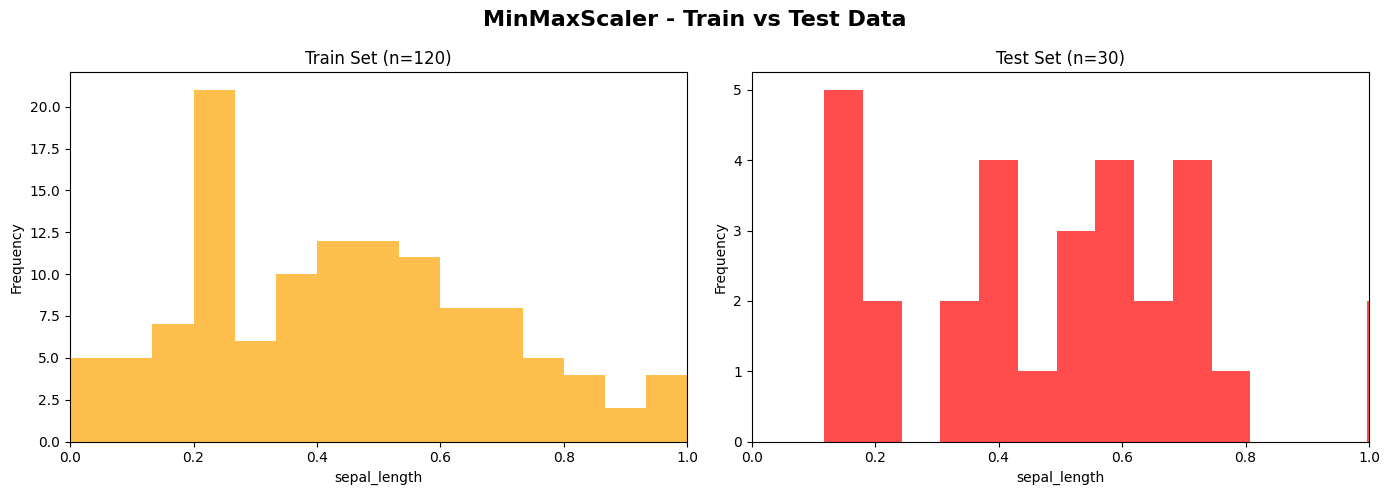

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('MinMaxScaler - Train vs Test Data', fontsize=16, fontweight='bold')

axes[0].hist(X_train_minmax['sepal_length'], bins=15, color='orange', alpha=0.7)
axes[0].set_title(f'Train Set (n={len(X_train_minmax)})')
axes[0].set_xlabel('sepal_length')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 1)

axes[1].hist(X_test_minmax['sepal_length'], bins=15, color='red', alpha=0.7)
axes[1].set_title(f'Test Set (n={len(X_test_minmax)})')
axes[1].set_xlabel('sepal_length')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(0, 1)

plt.tight_layout()
plt.show()

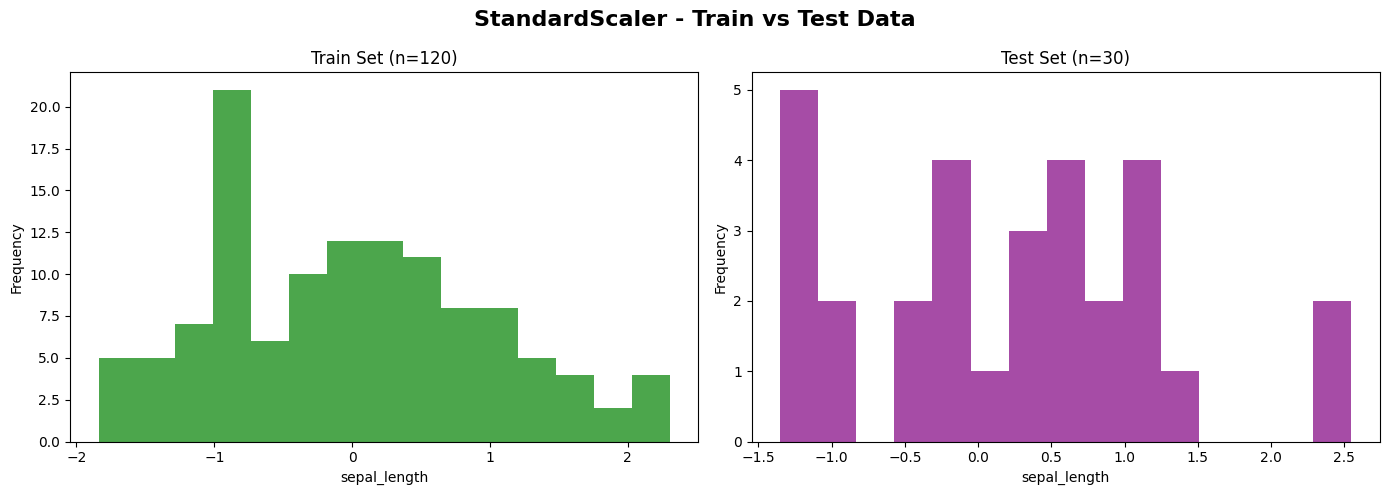

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('StandardScaler - Train vs Test Data', fontsize=16, fontweight='bold')

axes[0].hist(X_train_standard['sepal_length'], bins=15, color='green', alpha=0.7)
axes[0].set_title(f'Train Set (n={len(X_train_standard)})')
axes[0].set_xlabel('sepal_length')
axes[0].set_ylabel('Frequency')

axes[1].hist(X_test_standard['sepal_length'], bins=15, color='purple', alpha=0.7)
axes[1].set_title(f'Test Set (n={len(X_test_standard)})')
axes[1].set_xlabel('sepal_length')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()